# 2章 タスクと評価指標
## 2.3 評価指標
### 2.3.2 回帰における評価指標

#### RMSE(Root Mean Squared Error)

In [1]:
import numpy as np

y_true=np.array([1,1.5,2,1.2,1.8])
y_pred=np.array([0.8,1.5,1.8,1.3,3.0])

print('(yi-yi^)^2:',(y_true-y_pred)**2)
print('RMSE:',np.sqrt(((y_true-y_pred)**2).mean())) #平均の平方根

(yi-yi^)^2: [0.04 0.   0.04 0.01 1.44]
RMSE: 0.5531726674375732


In [2]:
#以下で計算可能
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

0.5531726674375732


#### RMSLE(Root Mean Squared Logarithmic Error)

In [49]:
#目的変数が裾の思い分布を持ち、大きな値の影響が強い場合に用いられる
#真の値と予測値の比率に着目したい場合に用いられる
#負に発散するのを防ぐために1を足す

y_true=np.array([100,0,400])
y_pred=np.array([200,10,200])

print('log(1+yi):',np.log(1+y_true))
print('log(1+yi^):',np.log(1+y_pred))
print('RMSLE:',np.sqrt(((np.log(1+y_true)-np.log(1+y_pred))**2).mean()))

log(1+yi): [4.61512052 0.         5.99396143]
log(1+yi^): [5.30330491 2.39789527 5.30330491]
RMSLE: 1.4944905400842203


In [50]:
#以下で計算可能
from sklearn.metrics import mean_squared_log_error
rmsle=np.sqrt(mean_squared_log_error(y_true,y_pred))
print(rmsle)

1.4944905400842203


#### MAE(Mean Absolute Error)

In [52]:
y_true=np.array([100,160,60])
y_pred=np.array([80,100,100])

print('|yi-yi^:',np.abs(y_true-y_pred))
print('MAE :',np.abs(y_true-y_pred).mean())

|yi-yi^: [20 60 40]
MAE : 40.0


In [54]:
#以下で計算可能
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_true,y_pred)
print(mae)

40.0


#### 決定係数

In [59]:
#回帰分析の当てはまりの良さを表す
#決定係数を最大化することは、RMSEを最小化することと同じ

y_true=np.array([100,130,135])
y_pred=np.array([100,120,140])

R2=1-((y_true-y_pred)**2).sum()/((y_true-y_true.mean())**2).sum()
print('R2:',R2)

R2: 0.8255813953488372


In [60]:
from sklearn.metrics import r2_score
R2=r2_score(y_true,y_pred)
print(R2)

0.8255813953488372


### 2.3.3 二値分類における評価指標

#### 混同行列(confusion matrix)

In [67]:
from sklearn.metrics import confusion_matrix

y_true=[1,0,1,1,0,1,1,0]
y_pred=[0,0,1,1,0,0,1,1]

tp=np.sum((np.array(y_true)==1)&(np.array(y_pred)==1))
tn=np.sum((np.array(y_true)==0)&(np.array(y_pred)==0))
fp=np.sum((np.array(y_true)==0)&(np.array(y_pred)==1))
fn=np.sum((np.array(y_true)==1)&(np.array(y_pred)==0))

confusion_matrix1=np.array([[tp,fp],
                          [fn,tn]])
print(confusion_matrix1)

[[3 1]
 [2 2]]


In [69]:
#以下でも計算可能
#配置に注意
confusion_matrix(y_true,y_pred)

array([[2, 1],
       [2, 3]], dtype=int64)

#### accuracy(正解率)とerror rate(誤答率)

In [75]:
#不均衡なデータには適していない
from sklearn.metrics import accuracy_score

y_true=[1,0,1,1,0,1,1,0]
y_pred=[0,0,1,1,0,0,1,1]

accuracy=(tp+tn)/(tp+tn+fp+fn)
print('accuracy:',accuracy)
print('error rate:',1-accuracy)

accuracy: 0.625
error rate: 0.375


In [77]:
#以下でも計算可能
accuracy=accuracy_score(y_true,y_pred)
print('accuracy:',accuracy)

accuracy: 0.625


#### precision(適合率)とrecall（正解率)

In [101]:
print('precision_score:',(tp/(tp+fp))) #過検出
print('recall_score:',(tp/(tp+fn))) #未検出

precision_score: 0.75
recall_score: 0.6


In [94]:
#以下でも計算可能
from sklearn.metrics import precision_score,recall_score
precision=precision_score(y_true,y_pred)
recall=recall_score(y_true,y_pred)
print('precision_score:',precision)
print('recall_score:',recall)

precision_score: 0.75
recall_score: 0.6


#### F1-scoreとFβ-score

In [104]:
#F1はrecallとprecisionの調和平均
#βはrecallをどれだけ重視するかを表す
#正負を対称に扱わないため、正負入れ替えると結果が変わる
b=1
F1=2/(1/recall+1/precision)
Fβ=(1+b**2)/(b**2/recall+1/precision)

print('F1-score:',F1)
print('Fβ-score',Fβ)

F1-score: 0.6666666666666666
Fβ-score 0.6666666666666666


In [106]:
#以下でも計算可能
from sklearn.metrics import f1_score,fbeta_score
print('F1-score',f1_score(y_true,y_pred))
print('Fβ-score',fbeta_score(y_true,y_pred,1))

F1-score 0.6666666666666665
Fβ-score 0.6666666666666665


#### MCC(Matthews Correlation Coefficient)

In [110]:
#不均衡なデータに対して性能を評価しやすい
#正負に対して対称なので、入れ替えても同じ
print('MCC:',(tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))

MCC: 0.2581988897471611


In [109]:
#以下でも計算可能
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true,y_pred)

0.2581988897471611

### 2.3.4 二値分類における評価指標～確率～

#### logloss

In [19]:
#低いほうが良い指標
#正解と確率が大きく異なるときにペナルティが与えられる
y_true=np.array([1,1,0])
y_pred=np.array([0.9,0.5,0.1])

pi=y_pred.copy()
for i in range(len(y_true)):
    if y_true[i]==0:
        pi[i]=1-y_pred[i]
    else:
        pi[i]=y_pred[i]
        
print('pi:',pi)
print('-logpi:',-np.log(pi))

print('logloss:',(-np.log(pi)).mean())

pi: [0.9 0.5 0.9]
-logpi: [0.10536052 0.69314718 0.10536052]
logloss: 0.3012894039585326


In [18]:
#以下でも計算可能
from sklearn.metrics import log_loss

#0,1で表される二値分類の真の値と予測確率
y_true=[1,0,1,1,0,1]
y_prob=[0.1,0.2,0.8,0.8,0.1,0.3]

logloss=log_loss(y_true,y_prob)
print(logloss)

0.7135581778200728


###### AUC(Area Under the ROC Curve)

In [25]:
#正例と負例をランダムに選んだ時に、正例の予測値が負例を上回る確率
#Gini係数=2*AUC-1

y_true=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0])
y_pred=np.array([15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]) #y_predは順番のみ重要になる

from sklearn.metrics import roc_auc_score
roc_auc_score(y_true,y_pred)

1.0

### 2.3.5 多クラス分類における評価指標
###### multi-class accuracy

In [27]:
from sklearn.metrics import accuracy_score
y_true=np.array([0,1,2,0,1,2])
y_pred=np.array([0,1,1,0,1,2])

#以下でも計算可能
accuracy=accuracy_score(y_true,y_pred)
print('accuracy:',accuracy)

accuracy: 0.8333333333333334


###### logloss

In [28]:
from sklearn.metrics import log_loss

#3クラス分類の真の値と予測値
y_true=np.array([0,2,1,2,2])
y_pred=np.array([[0.68,0.32,0],
                [0,0,1],
                [0.6,0.4,0],
                [0,0,1],
                [0.28,0.12,0.6]])

logloss=log_loss(y_true,y_pred)
print(logloss)

0.3625557672904274


###### mean-F1,macro-F1,micro-F1

In [15]:
from sklearn.metrics import f1_score

y_true=np.array([[1,1,0],
                [1,0,0],
                [1,1,1],
                [0,1,1],
                [0,0,1]])
y_pred=np.array([[1,0,1],
                [0,1,0],
                [1,0,1],
                [0,0,1],
                [0,0,1]])

#mean-f1はレコード事にF1-scoreを計算し平均をとる
mean_f1=np.mean([f1_score(y_true[i,:],y_pred[i,:]) for i in range(len(y_true))])
print('mean_f1:{}'.format(mean_f1))

#macro-f1はクラス毎にF1-scoreを計算して平均をとる
macro_f1=np.mean([f1_score(y_true[:,i],y_pred[:,i]) for i in range(len(y_true[0]))])
print('macro_f1:{}'.format(macro_f1))

#micro-f1はレコード＊クラスのペア毎にTP/TN/FP/FNを計算し、F1-scoreを求める
micro_f1=f1_score(y_true.reshape(-1),y_pred.reshape(-1))
print('micro_f1:{}'.format(micro_f1))

mean_f1:0.5933333333333334
macro_f1:0.5523809523809523
micro_f1:0.6250000000000001


In [16]:
#以下で計算可能
mean_f1=f1_score(y_true,y_pred,average='samples')
print('mean_f1:{}'.format(mean_f1))
macro_f1=f1_score(y_true,y_pred,average='macro')
print('macro_f1:{}'.format(macro_f1))
micro_f1=f1_score(y_true,y_pred,average='micro')
print('micro_f1:{}'.format(micro_f1))

mean_f1:0.5933333333333334
macro_f1:0.5523809523809523
micro_f1:0.6250000000000001


###### quadratic weighted kappa

In [30]:
#クラス間に順序関係があるような場合に使用される

from sklearn.metrics import confusion_matrix

y_true=[1,2,3,4,3]
y_pred=[2,2,4,4,5]

#混合行列を計算
c_matrix=confusion_matrix(y_true,y_pred)

numer=0
denom=0

for i in range(len(y_true)):
    for j in range(len(y_true)):
        wij=(i-j)**2
        oij=c_matrix[i,j]
        eij=c_matrix[i,:].sum()*c_matrix[:,j].sum()/c_matrix[:,:].sum()
        
        numer+=wij*oij
        denom+=wij*eij
        
print('kappa:{}'.format(1-numer/denom))

kappa:0.6153846153846154


In [34]:
#以下で計算可能
from sklearn.metrics import cohen_kappa_score
kappa=cohen_kappa_score(y_true,y_pred,weights='quadratic') #quadraticは2次の意味(wij)
print('kappa:{}'.format(kappa))

kappa:0.6153846153846154


### 2.3.6 レコメンデーションにおける評価指標
###### MAP@K:Mean Average Precision @ K

In [40]:
#K=3、レコード数は5、クラスは4種類とする
K=3

#各レコードの真の値
y_true=[[1,2],[1,2],[4],[1,2,3,4],[3,4]]

#各レコードに対する予測値
y_pred=[[1,2,4],[4,1,2],[1,4,3],[1,2,3],[1,2,4]]

#各レコード毎のaverage precisionを計算する関数
def apk(y_i_true,y_i_pred):
    #y_predがK以下の長さで、要素がすべて異なることを確認
    assert (len(y_i_pred)<=K)
    assert (len(np.unique(y_i_pred))==len(y_i_pred))
    
    sum_precision=0
    num_hits=0
    
    for i,p in enumerate(y_i_pred):
        if p in y_i_true:
            num_hits+=1
            precision=num_hits/(i+1)
            sum_precision+=precision
            
    return sum_precision/min(len(y_i_true),K)

#計算
result=np.mean([apk(y_i_true,y_i_pred) for y_i_true,y_i_pred in zip(y_true,y_pred)])
print(result)

0.6499999999999999


In [39]:
print(apk(y_true[0],y_pred[0])) #正解しているため1
print(apk(y_true[1],y_pred[1])) #正解はしているが順序が異なるためスコアが低い

1.0
0.5833333333333333


## 2.4 評価指標と目的関数
### 2.4.2 カスタム評価指標とカスタム目的関数

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [74]:
import xgboost as xgb
from sklearn.metrics import log_loss

#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain=xgb.DMatrix(X_train,label=y_train)
dvalid=xgb.DMatrix(X_test,label=y_test)

#ハイパーパラメータの設定
params={'silent':1,'randomstate':71,'objective':'binary:logistic'}
num_round=10
watchlist=[(dtrain,'train'),(dvalid,'eval')]

#モデルの学習の実行
bst=xgb.train(params,dtrain,num_round,watchlist)

pred=bst.predict(dvalid)
logloss=log_loss(y_test,pred)
print(logloss)

[01:22:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { randomstate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.02347	eval-error:0.06294
[1]	train-error:0.01409	eval-error:0.05594
[2]	train-error:0.00939	eval-error:0.06993
[3]	train-error:0.00939	eval-error:0.06294
[4]	train-error:0.00704	eval-error:0.06294
[5]	train-error:0.00704	eval-error:0.05594
[6]	train-error:0.00470	eval-error:0.05594
[7]	train-error:0.00470	eval-error:0.05594
[8]	train-error:0.00470	eval-error:0.05594
[9]	train-error:0.00470	eval-error:0.06294
0.13265311613783137


In [75]:
import xgboost as xgb
from sklearn.metrics import log_loss

#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain=xgb.DMatrix(X_train,label=y_train)
dvalid=xgb.DMatrix(X_test,label=y_test)

#カスタム目的関数
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess

#カスタム評価指標
def evalerror(preds,dtrain):
    labels=dtrain.get_label()
    return 'customerror',float(sum(labels != (preds>0.0)))/len(labels)

#ハイパーパラメータの設定
params={'silent':1,'randomstate':71}
num_round=10
watchlist=[(dtrain,'train'),(dvalid,'eval')]

#モデルの学習の実行
bst=xgb.train(params,dtrain,num_round,watchlist,obj=logregobj,feval=evalerror)

#確率に変換する前の値で予測値が出力されるので変換が必要
pred_val=bst.predict(dvalid)
pred=1.0/(1.0+np.exp(-pred_val))
logloss=log_loss(y_test,pred)
print(logloss)

[01:22:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { randomstate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.20260	eval-rmse:0.28950	train-customerror:0.02817	eval-customerror:0.04895
[1]	train-rmse:0.52833	eval-rmse:0.57972	train-customerror:0.01409	eval-customerror:0.06993
[2]	train-rmse:0.87204	eval-rmse:0.91524	train-customerror:0.00704	eval-customerror:0.06993
[3]	train-rmse:1.18695	eval-rmse:1.20231	train-customerror:0.00939	eval-customerror:0.06993
[4]	train-rmse:1.48862	eval-rmse:1.50450	train-customerror:0.00704	eval-customerror:0.05594
[5]	train-rmse:1.77133	eval-rmse:1.78337	train-customerror:0.00939	eval-customerror:0.05594
[6]	train-rmse:2.03232	eval-rmse:2.03950	train-cust

## 2.5 評価指標の最適化
### 2.5.2 閾値の最適化

In [34]:
from sklearn.metrics import f1_score
from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [8]:
#サンプルデータ生成の準備
rand=np.random.RandomState(seed=71)
train_y_prob=np.linspace(0,1.0,10000)

In [15]:
#真の値と予測値が以下のtrain_y,train_pred_probであったとする
train_y=pd.Series(rand.uniform(0.0,1.0,train_y_prob.size)<train_y_prob)
train_pred_prob=np.clip(train_y_prob*np.exp(rand.standard_normal(train_y_prob.shape)*0.3),0.0,1.0)

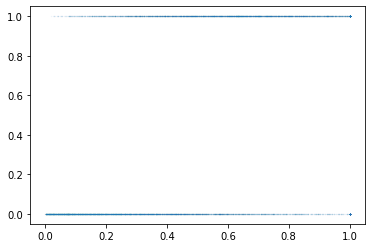

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_pred_prob,train_y,alpha=0.1,s=0.1)

In [19]:
init_threshold=0.5
init_score=f1_score(train_y,train_pred_prob>=init_threshold)
print(init_threshold,init_score)

0.5 0.7146233686157641


In [27]:
def f1_opt(x):
    return -f1_score(train_y,train_pred_prob>=x)

result=minimize(f1_opt,x0=np.array([0.5]),method='Nelder-Mead')
best_threshold=result['x'].item()
best_score=f1_score(train_y,train_pred_prob>=best_threshold)
print(best_threshold,best_score)

0.3295898437499998 0.7496095783446122


### 2.5.3 閾値の最適化をout-of-foldで行うべきか

In [35]:
#サンプルデータ生成の準備
rand=np.random.RandomState(seed=71)
train_y_prob=np.linspace(0,1.0,10000)

In [36]:
train_y=pd.Series(rand.uniform(0.0,1.0,train_y_prob.size)<train_y_prob)
train_pred_prob=np.clip(train_y_prob*np.exp(rand.standard_normal(train_y_prob.shape)*0.3),0.0,1.0)

In [38]:
from sklearn.model_selection import KFold
thresholds=[]
scores_tr=[]
scores_va=[]
kf=KFold(n_splits=4,random_state=71,shuffle=True)
for i, (tr_idx,va_idx) in enumerate(kf.split(train_pred_prob)):
    tr_pred_prob,va_pred_prob=train_pred_prob[tr_idx],train_pred_prob[va_idx]
    tr_y,va_y=train_y.iloc[tr_idx],train_y.iloc[va_idx]
    
    def f1_opt(x):
        return -f1_score(tr_y,tr_pred_prob>=x)
    
    result=minimize(f1_opt,x0=np.array([0.5]),method='Nelder-Mead')
    threshold=result['x'].item()
    
    score_tr=f1_score(tr_y,tr_pred_prob>=threshold)
    score_va=f1_score(va_y,va_pred_prob>=threshold)
    print(threshold,score_tr,score_va)
    
    thresholds.append(threshold)
    scores_tr.append(score_tr)
    scores_va.append(score_va)
    
threshold_test=np.mean(thresholds)
print(threshold_test)

0.34257812499999984 0.7559183673469387 0.7570422535211268
0.34277343749999983 0.7598457403295548 0.7450980392156863
0.31787109374999983 0.7548253676470588 0.7584803256445047
0.3234374999999998 0.7545569184913447 0.7588603196664351
0.33166503906249983
